In [208]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline  

In [209]:
df = pd.read_csv('monumentos_espana.csv')
print(np.sort(df.provincia.unique()))

['-' 'A Coruña' 'Albacete' 'Alicante-Alacant' 'Almería' 'Araba-Álava'
 'Asturias' 'Badajoz' 'Barcelona' 'Bizkaia' 'Burgos' 'Cantabria'
 'Castellón-Castelló' 'Ceuta' 'Ciudad Real' 'Cuenca' 'Cáceres' 'Cádiz'
 'Córdoba' 'Gipuzkoa' 'Girona' 'Gran Canaria' 'Granada' 'Guadalajara'
 'Huelva' 'Huesca' 'Ibiza' 'Jaén' 'La Palma' 'La Rioja' 'Lanzarote' 'León'
 'Lleida' 'Lugo' 'Madrid' 'Mallorca' 'Melilla' 'Menorca' 'Murcia' 'Málaga'
 'Navarra' 'Ourense' 'Palencia' 'Pontevedra' 'Salamanca' 'Segovia'
 'Sevilla' 'Soria' 'Tarragona' 'Tenerife' 'Teruel' 'Toledo'
 'Valencia-València' 'Valladolid' 'Zamora' 'Zaragoza' 'Ávila']


In [197]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))
gdf['legend'] = gdf['id'].astype(str) + '. '+ gdf['Name']

[Licencia ign](http://www.ign.es/resources/licencia/Condiciones_licenciaUso_IGN.pdf)

In [198]:
map_data = gpd.read_file('./shp/recintos_provinciales_inspire_peninbal_etrs89.shp')

In [203]:
print(map_data.NAMEUNIT.to_list())

['Lleida', 'León', 'Jaén', 'Huesca', 'Huelva', 'Gipuzkoa', 'Guadalajara', 'Granada', 'Girona', 'Cuenca', 'A Coruña', 'Córdoba', 'Ciudad Real', 'Castelló/Castellón', 'Cádiz', 'Cáceres', 'Burgos', 'Barcelona', 'Illes Balears', 'Badajoz', 'Ávila', 'Almería', 'Alacant/Alicante', 'Albacete', 'Araba/Álava', 'Territorio no asociado a ninguna provincia', 'Territorio no asociado a ninguna provincia', 'Melilla', 'Ceuta', 'Zaragoza', 'Zamora', 'Bizkaia', 'Valladolid', 'València/Valencia', 'Toledo', 'Teruel', 'Tarragona', 'Soria', 'Sevilla', 'Segovia', 'Cantabria', 'Salamanca', 'Pontevedra', 'Palencia', 'Asturias', 'Ourense', 'Navarra', 'Murcia', 'Málaga', 'Madrid', 'Lugo', 'La Rioja']


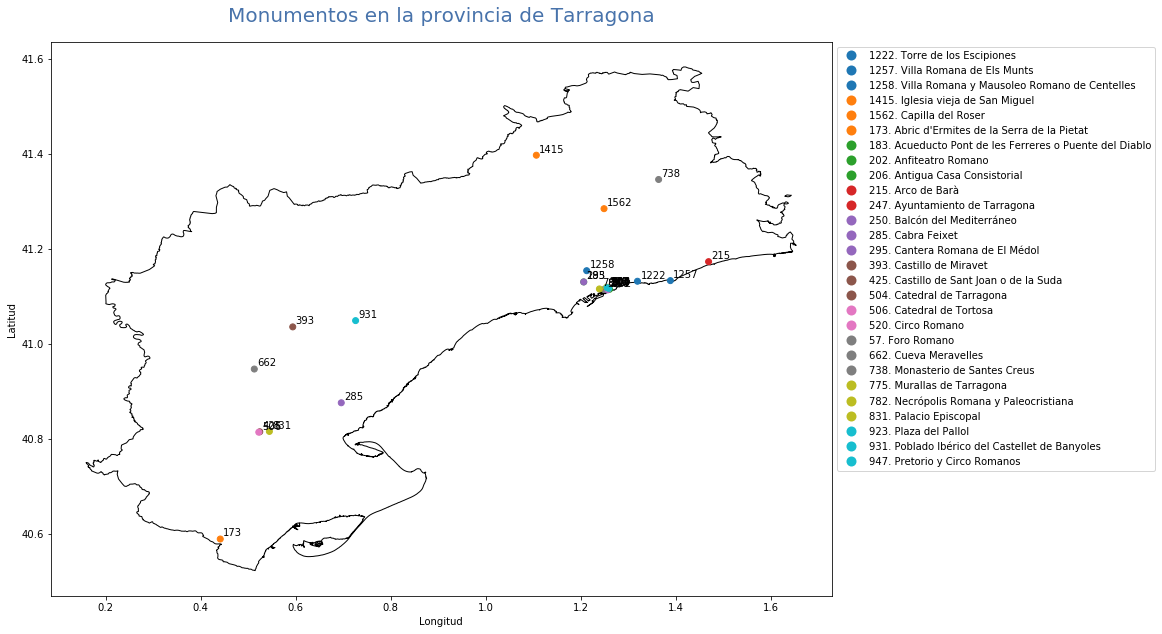

In [200]:
prov = 'Tarragona'
prov1 = 'Tarragona'
gdf_p = gdf[gdf.provincia==prov]
# Control del tamaño de la figura del mapa
fig, ax = plt.subplots(figsize=(14, 14))
ax.set_title('Monumentos en la provincia de ' + prov, 
             pad = 20, 
             fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
map_data[map_data.NAMEUNIT==prov1].plot(color='white', edgecolor='black', ax=ax)
gdf_p.plot(column='legend', categorical=True, ax=ax, legend=True, legend_kwds=dict(loc='upper left', bbox_to_anchor=(1, 1)))

for x, y, label in zip(gdf_p.geometry.x, gdf_p.geometry.y, gdf_p.id):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")
plt.show()